# Low Pass Filter Calculations
### Calculating the required components to build a low pass filter with a given cutoff frequency

### 1. Using Scipy

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
cutoff = 1.5

In [3]:
order=1
b, a = signal.butter(order, cutoff, btype='low', analog=True)

In [4]:
w, h = signal.freqs(b, a)

/home/caio/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


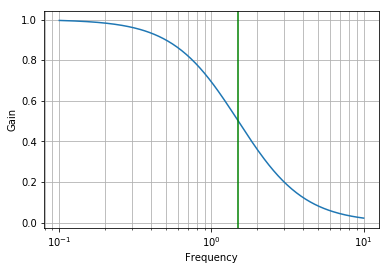

In [5]:
plt.plot(w,h)
plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # Vertical line at cutoff frequency
plt.show()

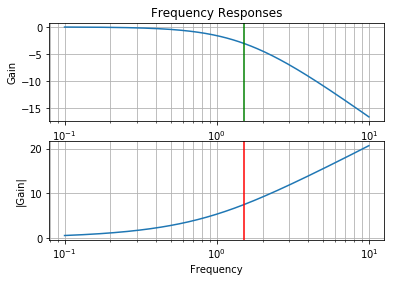

In [29]:
gain = 20*np.log10(h)
plt.subplot(2,1,1)
plt.plot(w, gain)
plt.title("Frequency Responses")
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green') # Vertical line at cutoff frequency

plt.subplot(2,1,2)
plt.plot(w, abs(gain))
plt.xlabel('Frequency')
plt.ylabel('|Gain|')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='red') # Vertical line at cutoff frequency
plt.show()

In [6]:
print(gain[:10])
print(abs(gain[:10]))

NameError: name 'gain' is not defined

### 2. Using Circuits Theory

$\int_0^\infty \mathrm{e}^{-x}\,\mathrm{d}x$

We know that **Vout = R*I** (Vout and I are phasors) and **I = $\frac{Vin}{Z}$**, where **Z = R + $\frac{1}{jwC}$**.


From simple algebraic manipulation, we get to the _frequency response equation_:
    __$\frac{Vout}{Vin}$ = $\frac{1}{1 + \frac{1}{jwRC}}$__

And the absolute value of the frequency respose is, therefore:
  $ \langle \frac{Vout}{Vin} \rangle = \frac{1}{\sqrt{1+(\frac{1}{wRC})^2}}$

In [ ]:
npoints = 1000
x = np.zeros(npoints)
for i in range (npoints):
    x[i] = i +1
x = np.linspace(0.0, 1000.0)
    
y = 1/np.sqrt(1+((1/x*r*c)*(1/x*r*c)))

In [ ]:
plt.plot(x, y)

plt.xlabel('Frequency')
plt.ylabel('Gain')
plt.xscale('log')
plt.grid(which='both', axis='both')
plt.axvline(w, color='green') # Vertical line at cutoff frequency
plt.show()

In [ ]:
r = 1000 # Arbitrairly choosing r as 1kohm
f = 450 #Hz
w = 2*np.pi*f
c=1/w
print(c)